In [45]:
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import random
import math

df = pd.read_csv('Salaries.csv')

df = df.dropna()
df = df.dropna(axis=0)

df = df[(df != 0).all(1)]

In [46]:
df = df.drop(df[df['annual_base_pay'] >= 1000000].index, inplace = False)
df = df.drop(df[df['annual_base_pay'] <= 15000].index, inplace = False)
df

,total_experience_years,annual_base_pay
0,13.0,125000.0
1,15.0,65000.0
2,4.0,86000.0
3,4.0,105000.0
4,4.0,110000.0
...,...,...
1648,4.0,130000.0
1650,1.0,60500.0
1651,6.0,164000.0
1652,7.0,150000.0


In [47]:
df.dropna()

,total_experience_years,annual_base_pay
0,13.0,125000.0
1,15.0,65000.0
2,4.0,86000.0
3,4.0,105000.0
4,4.0,110000.0
...,...,...
1648,4.0,130000.0
1650,1.0,60500.0
1651,6.0,164000.0
1652,7.0,150000.0


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1454 entries, 0 to 1653
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   total_experience_years  1454 non-null   float64
 1   annual_base_pay         1454 non-null   float64
dtypes: float64(2)
memory usage: 34.1 KB


,total_experience_years,annual_base_pay
0,13.0,125000.0
1,15.0,65000.0
2,4.0,86000.0
3,4.0,105000.0
4,4.0,110000.0
...,...,...
1648,4.0,130000.0
1650,1.0,60500.0
1651,6.0,164000.0
1652,7.0,150000.0


<AxesSubplot:xlabel='total_experience_years', ylabel='annual_base_pay'>

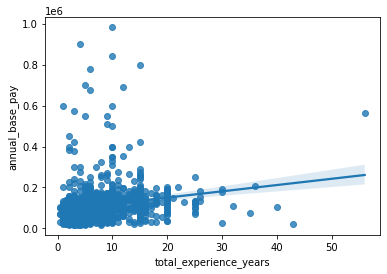

In [51]:
sns.regplot(data=df, x="total_experience_years", y="annual_base_pay")

In [49]:
def testTrainSplit(data):
  length = len(df.index)
  splitLimit = int(length * 0.7)
  train = data[0: splitLimit]
  test = data[splitLimit + 1: length]
  return train, test

In [50]:
train, test = testTrainSplit(df)

In [188]:
def sumOfDistances(a, b, c, trainDF):
  sum = 0
  for row in range(0, len(trainDF.index)):
    gpa = trainDF.iat[row, 0]
    sat = trainDF.iat[row, 1]
    distance = abs((a*gpa) + (b*sat) + c) / math.sqrt((a*a) + (b*b))
    sum = sum + distance
  return sum

In [189]:
def trainLinearRegression(trainDF):
  count = 0
  slopes = {}
  while count < 100:
    a = random.randint(25000,50000)#Slope
    b = 1 # Coefficient to y --> by = ax + c --> negative because we move to other side
    c = 50000 # Y-intercept
    sum = sumOfDistances(a, b, c, trainDF)
    slopes[a] = sum
    count = count + 1
  print(slopes)

In [190]:
trainData = trainLinearRegression(train)



{29161: 13031.020135680117, 47849: 10805.03553526914, 39424: 11547.321017490625, 47348: 10841.788961424118, 41406: 11345.524208158167, 35388: 12028.126113090679, 25310: 13898.208753276984, 35044: 12074.22849468462, 39727: 11515.1673304068, 32830: 12394.064734426993, 25184: 13931.062756647652, 45671: 10970.680827656373, 26957: 13497.005446809995, 34012: 12218.131036116221, 33079: 12355.957213133273, 28028: 13261.413515892169, 34763: 12112.564778235022, 41181: 11367.455133726295, 38619: 11635.196713777132, 27115: 13461.079309303988, 40211: 11464.811550507126, 46633: 10895.609204708628, 47374: 10839.86247362672, 25055: 13965.0413347161, 40038: 11482.670810644971, 40222: 11463.681185358624, 34476: 12152.364715273116, 37633: 11747.953232639298, 47119: 10858.848700625475, 29024: 13057.922812674004, 45316: 10999.18909830169, 31859: 12548.359366052415, 36116: 11933.456560382934, 25389: 13877.776137961202, 39309: 11559.65433089024, 37974: 11708.294959336361, 48357: 10768.546187080563, 34268: 12

In [130]:
def MSE(testDF, m, b):
  sum = 0
  for row in range(0, len(testDF.index)):
    pay = testDF.iat[row, 0]
    actual = testDF.iat[row, 1]
    predicted = m * pay + b
    sum = sum + (predicted - actual) * (predicted - actual)
  return sum/len(testDF.index)

In [131]:
print(MSE(test, 861, 50000))

13174762945.10889


In [153]:
x = df['annual_base_pay']

y = df['total_experience_years']

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)


In [52]:
regr = linear_model.LinearRegression()

regr.fit(train, train['annual_base_pay'])

LinearRegression()

In [53]:
predictions = regr.predict(test)

In [54]:
regr.coef_

array([1.84399064e-13, 1.00000000e+00])

In [55]:
mean_squared_error(test['annual_base_pay'],predictions)

2.610794499980213e-21

In [56]:
regr.intercept_

-4.3655745685100555e-11

In [154]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(train, train['annual_base_pay'])


LinearRegression()

In [155]:
model.coef_

array([-1.45500739e-12,  1.00000000e+00])

In [156]:
model.intercept_

5.820766091346741e-11

In [160]:
pd.DataFrame(model.coef_, x.columns, columns = ['Coef'])

AttributeError: 'Series' object has no attribute 'columns'

In [159]:
predictions = model.predict(x_test)

C:\Users\acabalo\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[2.5000000e+04 8.3500000e+04 6.7200000e+04 9.8000000e+04 1.2000000e+05
 7.0000000e+04 9.2000000e+04 6.0000000e+04 7.5000000e+04 7.5000000e+04
 1.7500000e+05 1.1250000e+05 1.1500000e+05 9.5000000e+04 1.1800000e+05
 1.3000000e+05 7.5000000e+04 1.1800000e+05 3.2524000e+04 7.3000000e+04
 1.4500000e+05 1.6000000e+05 1.9000000e+04 1.0000000e+05 1.2800000e+05
 2.1600000e+05 1.5500000e+05 6.5198700e+04 8.5000000e+04 6.5000000e+04
 1.2000000e+05 1.0500000e+05 1.1950000e+05 8.0000000e+04 1.2000000e+05
 4.0000000e+04 5.0000000e+05 1.1040648e+05 1.0300000e+05 1.2400000e+05
 2.6700000e+05 1.2000000e+05 1.5200000e+03 3.0000000e+04 6.0000000e+04
 6.0000000e+01 1.8500000e+05 1.6000000e+05 1.2500000e+05 6.3000000e+04
 1.0000000e+05 6.5000000e+04 8.5000000e+04 2.3000000e+04 8.1500000e+04
 6.5000000e+04 1.0200000e+05 1.2500000e+05 1.3000000e+05 4.5000000e+04
 2.1600000e+05 7.5000000e+04 3.2000000e+04 1.1802600e+05 8.5000000e+04
 1.1000000e+05 6.8256000e+04 6.5000000e+04 7.2000000e+04 1.4000000e+05
 2.8500000e+04 7.4000000e+04 1.4500000e+05 1.4500000e+05 9.0000000e+04
 1.2000000e+05 4.2000000e+04 1.2000000e+05 6.6500000e+04 1.1337500e+05
 1.2500000e+05 8.6000000e+04 2.0000000e+04 5.1000000e+04 1.1500000e+05
 1.1000000e+05 6.0000000e+04 1.2000000e+05 1.0920000e+05 8.5000000e+04
 1.5000000e+05 1.5000000e+05 1.3100000e+05 9.6000000e+04 5.5000000e+04
 1.3200000e+05 9.3000000e+04 3.0000000e+04 8.7000000e+04 1.4000000e+05
 7.0000000e+04 1.7000000e+02 1.3200000e+05 6.5000000e+04 1.1200000e+05
 1.1500000e+05 8.5000000e+04 8.5000000e+04 1.2600000e+05 1.4500000e+05
 1.3500000e+05 3.6500000e+01 8.4000000e+03 1.5500000e+05 1.3000000e+05
 1.3000000e+05 8.6500000e+04 2.2500000e+05 7.5000000e+04 1.3000000e+05
 2.1027000e+04 3.5000000e+04 1.6500000e+05 3.2000000e+04 7.3200000e+04
 1.6000000e+05 1.2000000e+05 9.6000000e+04 4.2000000e+04 6.2000000e+04
 1.3000000e+05 7.8500000e+04 1.4500000e+05 1.6500000e+05 1.3500000e+05
 6.0000000e+04 5.7500000e+05 7.5000000e+04 1.1500000e+05 1.8100000e+05
 1.7800000e+05 2.3000000e+04 6.2000000e+04 1.1000000e+05 5.5000000e+04
 9.7000000e+04 2.0600000e+05 1.6000000e+05 1.2500000e+05 1.0600000e+04
 1.3200000e+05 6.1000000e+04 5.2200000e+04 1.0000000e+05 3.8400000e+04
 1.0000000e+04 1.7000000e+05 5.4036000e+04 1.4500000e+05 1.8000000e+05
 1.0200000e+05 4.4000000e+04 1.3000000e+05 3.4500000e+04 1.1900000e+05
 5.4100000e+04 4.5000000e+04 1.3000000e+05 1.0000000e+05 7.8000000e+05
 1.1000000e+05 1.0100000e+05 1.2618000e+04 7.5000000e+04 4.9000000e+04
 1.3000000e+05 2.3600000e+05 6.0000000e+04 7.4000000e+04 5.5000000e+04
 7.0000000e+03 8.5000000e+04 1.0000000e+03 1.3500000e+05 4.3680000e+04
 6.0000000e+04 9.0000000e+04 7.0000000e+04 1.4000000e+05 7.1000000e+04
 8.9000000e+04 5.6565600e+05 9.0000000e+04 1.7000000e+05 1.0800000e+05
 1.0000000e+05 9.5000000e+04 3.6276000e+04 5.1000000e+05 1.5000000e+05
 7.7000000e+04 7.5000000e+04 9.0000000e+04 3.3000000e+05 6.9000000e+04
 2.4000000e+05 4.0000000e+01 2.7600000e+04 1.2500000e+05 5.7000000e+04
 3.6090000e+03 1.3000000e+05 1.5000000e+05 2.0500000e+05 4.5960000e+01
 1.5600000e+05 2.5000000e+05 1.2500000e+05 7.5000000e+04 8.0000000e+04
 1.5500000e+05 3.0000000e+04 2.9000000e+04 1.0500000e+05 1.0000000e+05
 1.2400000e+05 1.7000000e+05 8.8800000e+04 5.5000000e+04 4.5000000e+04
 5.5000000e+04 2.8000000e+04 9.5000000e+04 7.5000000e+04 7.3000000e+04
 1.4600000e+05 5.4000000e+04 2.1000000e+05 6.0000000e+05 7.5000000e+04
 9.4000000e+04 3.1000000e+04 8.4000000e+05 8.2000000e+04 4.0000000e+05
 1.0000000e+05 1.4000000e+05 1.1200000e+05 1.0359500e+05 4.3000000e+04
 1.2000000e+05 1.0500000e+05 9.5000000e+04 8.0000000e+04 1.7500000e+05
 1.6500000e+05 1.2800000e+05 1.0500000e+05 3.6000000e+04 1.3100000e+05
 1.1000000e+05 1.0500000e+05 2.5000000e+04 7.2000000e+04 1.4000000e+05
 8.0000000e+04 5.5000000e+04 5.5000000e+04 9.5000000e+04 1.0500000e+05
 7.5000000e+04 9.4000000e+04 4.0000000e+05 1.2600000e+05 2.0000000e+04
 1.5000000e+05 9.2000000e+04 1.2600000e+05 1.5000000e+05 1.5000000e+05
 1.1000000e+05 1.0800000e+05 1.0600000e+05 1.2000000e+05 1.2500000e+05
 3.3000000e+04 1.1000000e+05 1.0000000e+05 5.5000000e+04 2.1000000e+05
 1.3000000e+05 4.2000000e+04 1.7000000e+05 1.0000000e+05 9.5000000e+04
 3.6000000e+04 1.4000000e+05 6.1000000e+04 4.0000000e+04 7.3000000e+04
 1.2000000e+05 1.1136000e+05 8.5000000e+04 7.0000000e+04 3.2000000e+04
 4.6000000e+04 1.7000000e+05 1.0900000e+05 6.3000000e+04 1.2500000e+05
 1.1000000e+05 6.0000000e+04 1.5642000e+02 1.2500000e+05 5.5000000e+04
 7.5000000e+04 6.4000000e+03 6.2000000e+04 1.3700000e+05 1.1200000e+05
 7.0000000e+04 9.6000000e+04 1.2000000e+05 1.4500000e+05 1.9500000e+05
 8.8000000e+04 1.4500000e+05 2.9000000e+05 9.5000000e+04 5.9724000e+04
 1.1300000e+05 1.0500000e+05 1.1500000e+05 1.0500000e+05 1.7500000e+05
 7.8000000e+04 5.5000000e+04 8.0000000e+04 2.3423000e+04 5.0000000e+04
 8.3000000e+04 1.0100000e+05 8.8000000e+04 9.0000000e+04 1.1700000e+05
 3.2500000e+05 5.0000000e+04 8.6742000e+04 1.1500000e+05 5.7000000e+04
 7.0000000e+04 8.0000000e+03 9.0000000e+04 1.8000000e+05 8.7000000e+04
 3.0500000e+04 1.2000000e+05 1.4600000e+05 8.0000000e+04 7.0200000e+04
 6.7000000e+04 5.5000000e+01 1.1700000e+05 7.8000000e+04 2.2500000e+05
 1.1200000e+05 1.4000000e+05 6.1500000e+04 7.3500000e+04 1.2000000e+05
 6.9678000e+04 1.2000000e+05 3.6000000e+04 1.8500000e+05 1.1000000e+05
 1.3000000e+05 7.5000000e+04 1.4600000e+05 7.9500000e+03 1.0000000e+05
 1.4000000e+03 1.6500000e+05 6.9000000e+05 9.9000000e+04 1.0500000e+05
 5.0000000e+04 5.8000000e+04 1.2500000e+05 2.2176000e+04 1.2589500e+05
 1.5000000e+02 1.0000000e+05 4.5000000e+04 1.7500000e+05 1.9800000e+05
 4.6999000e+04 7.0000000e+04 1.1500000e+05 7.0000000e+04 3.5000000e+05
 7.5000000e+04 8.0000000e+04 1.2850000e+05 1.3050000e+05 9.7000000e+04
 1.0800000e+05 8.5320000e+04 1.1500000e+05 1.0600000e+05 6.4000000e+04
 1.0025000e+05 8.4000000e+04 6.1000000e+04 1.2000000e+05 8.8000000e+04
 1.2600000e+05 1.7500000e+05 9.0000000e+04 7.0000000e+04 8.5000000e+04
 9.8000000e+04 1.5000000e+05 1.0200000e+05 1.3000000e+05 1.3200000e+05
 3.7500000e+04 1.5000000e+05 1.3200000e+05 4.2660000e+04 1.0000000e+05
 8.5000000e+04 3.1000000e+01 5.1000000e+04 6.0000000e+04 6.0000000e+04
 1.5000000e+05 1.3000000e+05 2.5200000e+04 1.1000000e+05 7.1100000e+04
 1.3200000e+04 1.1500000e+05 1.2300000e+05 1.0000000e+05 1.4600000e+05
 1.0500000e+05 9.0000000e+04 9.0000000e+04 2.5000000e+05 3.8000000e+04
 5.0000000e+04 1.6000000e+05 3.0000000e+04 1.6500000e+05 1.5200000e+05
 2.0000000e+05 1.8500000e+05 9.9190000e+04 1.4400000e+05 3.8150000e+04
 1.3000000e+05 8.5320000e+04 4.5000000e+04 1.0000000e+05 1.3000000e+04
 1.4600000e+05 8.0000000e+04 1.6100000e+05 1.5100000e+05 1.7264000e+04
 4.3000000e+04 1.2000000e+05 1.4300000e+05 1.4400000e+05 1.6500000e+05
 1.2500000e+05 1.5000000e+05].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.